In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
db = pd.read_csv("/content/diabetes (1).csv")

In [ ]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db.shape

(768, 9)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### However the dataset shows some of the features having minimum value as 0 like insulin,BMI,glucose which is not logical and can be considered missing values

In [8]:
print(f"the missing values for glucose are : ",len(db.loc[db.Glucose==0]))
print(f"the missing values for insulin are : ",len(db.loc[db.Insulin==0]))
print(f"the missing values for bloodpressure are : ",len(db.loc[db.BloodPressure==0]))
print(f"the missing values for SkinThickness are : ",len(db.loc[db.SkinThickness==0]))
print(f"the missing values for BMI are : ",len(db.loc[db.BMI==0]))

the missing values for glucose are :  5
the missing values for insulin are :  374
the missing values for bloodpressure are :  35
the missing values for SkinThickness are :  227
the missing values for BMI are :  11


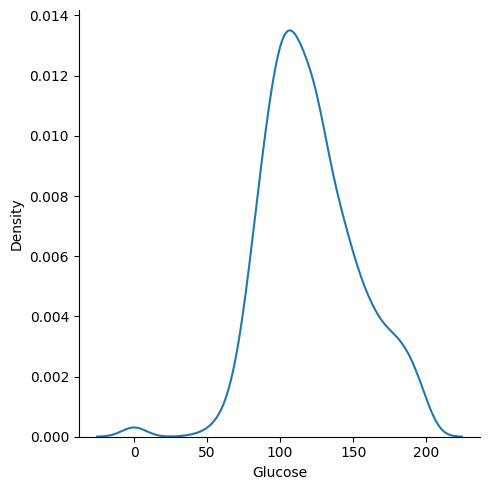

In [9]:
### Check distribution -- Kernel density estimation
#  A histogram aims to approximate the underlying probability density function that generated the data by
# binning and counting observations. Kernel density estimation (KDE) presents a different solution
# to the same problem. Rather than using discrete bins,
# a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:
sns.displot(db, x="Glucose", kind="kde")

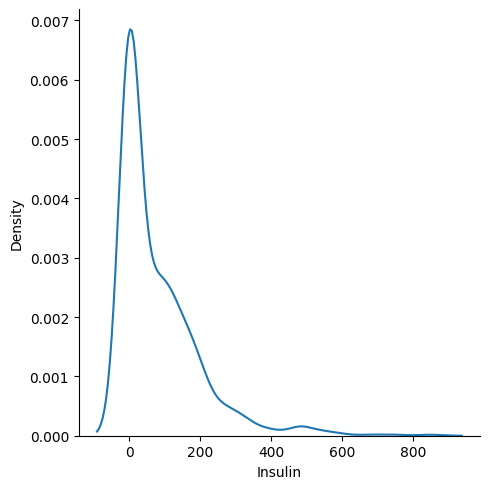

In [10]:
sns.displot(db, x="Insulin", kind="kde")

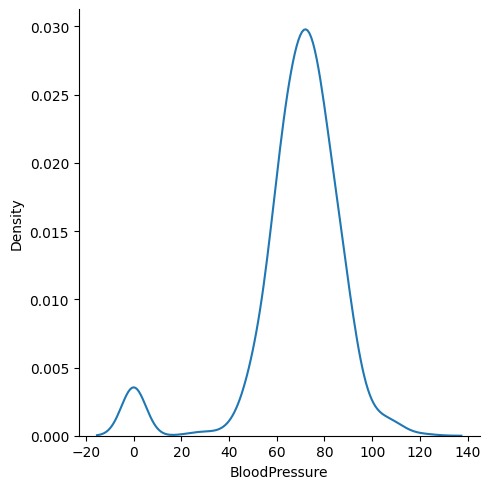

In [11]:
sns.displot(db, x="BloodPressure", kind="kde")

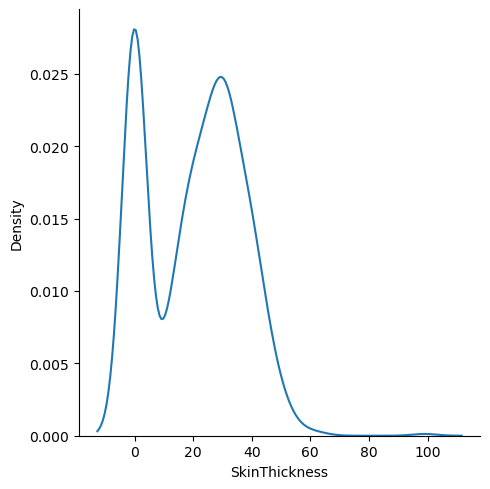

In [ ]:
sns.displot(db, x="SkinThickness", kind="kde")

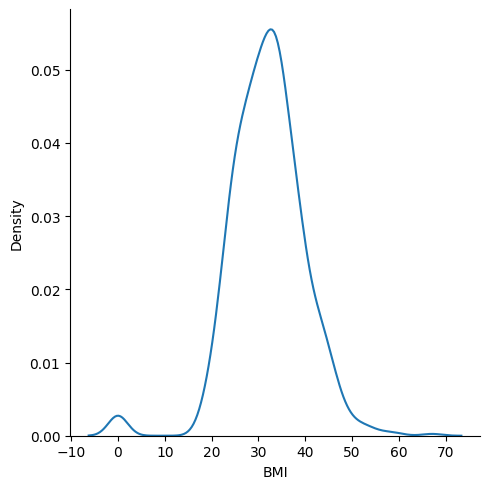

In [12]:
sns.displot(db, x="BMI", kind="kde")

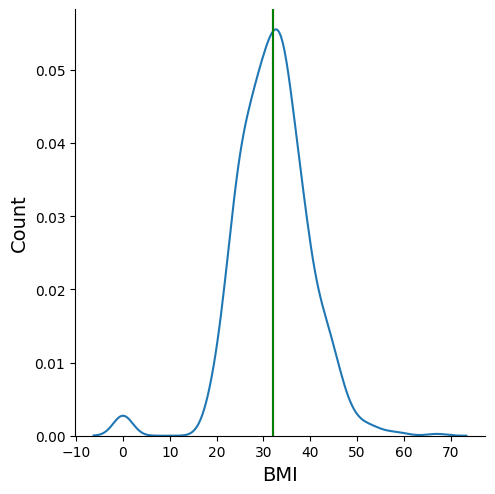

In [13]:
sns.displot(db, x="BMI", kind="kde")
plt.xlabel("BMI", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=db.BMI.median(),
            color='red')
plt.axvline(x=db.BMI.mean(),
            color='green')

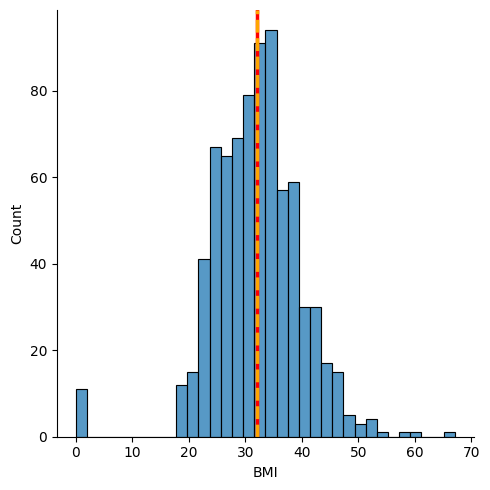

In [14]:
g = sns.displot(
    data=db, x='BMI',
    facet_kws=dict(sharey=False, sharex=False)
)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)

g.map(specs,'BMI' )

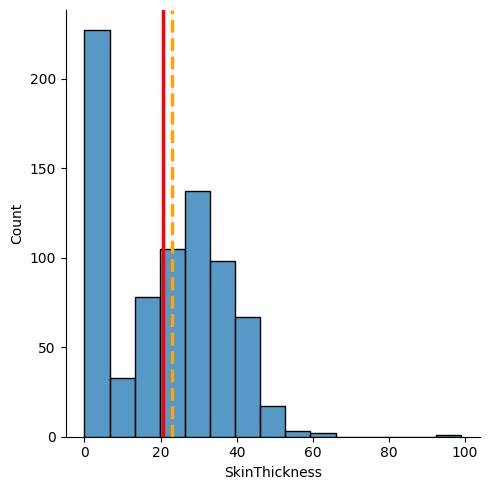

In [15]:
g = sns.displot(
    data=db, x='SkinThickness',
    facet_kws=dict(sharey=False, sharex=False)
)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)

g.map(specs,'SkinThickness' )

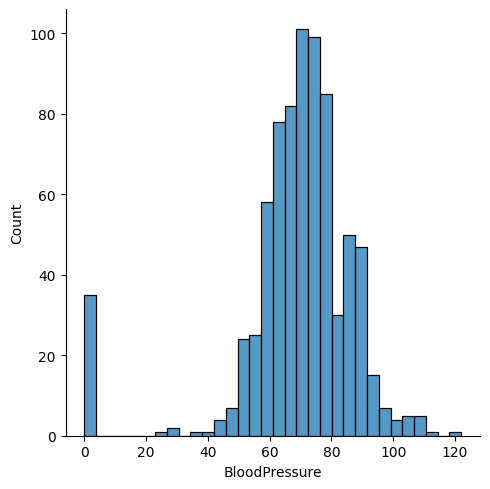

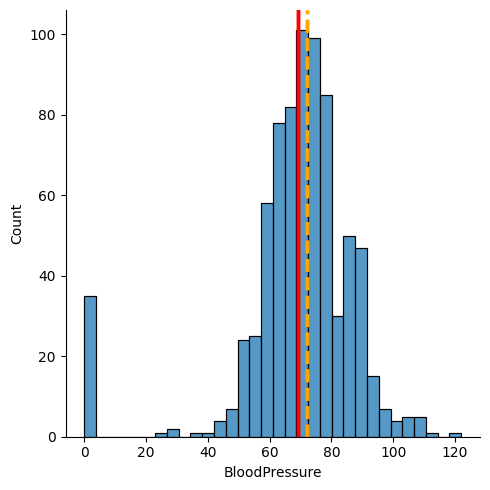

In [16]:
g = sns.displot(
    data=db, x='BloodPressure',
    facet_kws=dict(sharey=False, sharex=False)
)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)
g = sns.displot(
    data=db, x='BloodPressure',
    facet_kws=dict(sharey=False, sharex=False)
)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)

g.map(specs,'BloodPressure' )
g.map(specs,'BloodPressure' )

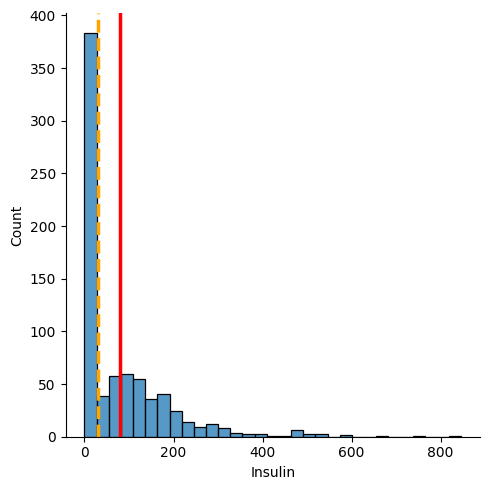

In [17]:
g = sns.displot(
    data=db, x='Insulin',
    facet_kws=dict(sharey=False, sharex=False)
)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)

g.map(specs,'Insulin' )

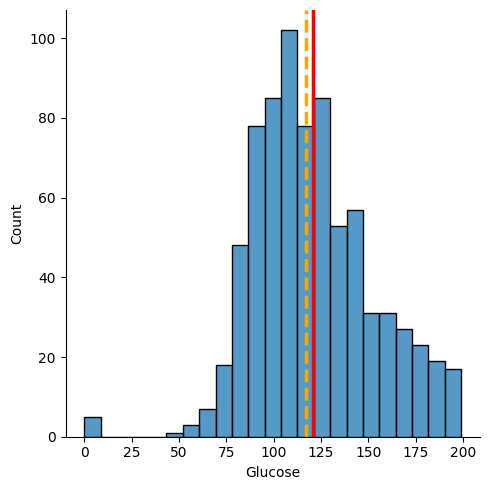

In [18]:
g = sns.displot(
    data=db, x='Glucose',
    facet_kws=dict(sharey=False, sharex=False)
)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)

g.map(specs,'Glucose' )

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
impute= SimpleImputer(missing_values=0, strategy="median")

In [21]:
db.iloc[:,1:6]= impute.fit_transform(db.iloc[:,1:6])

In [ ]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### All the zero values have been imputed

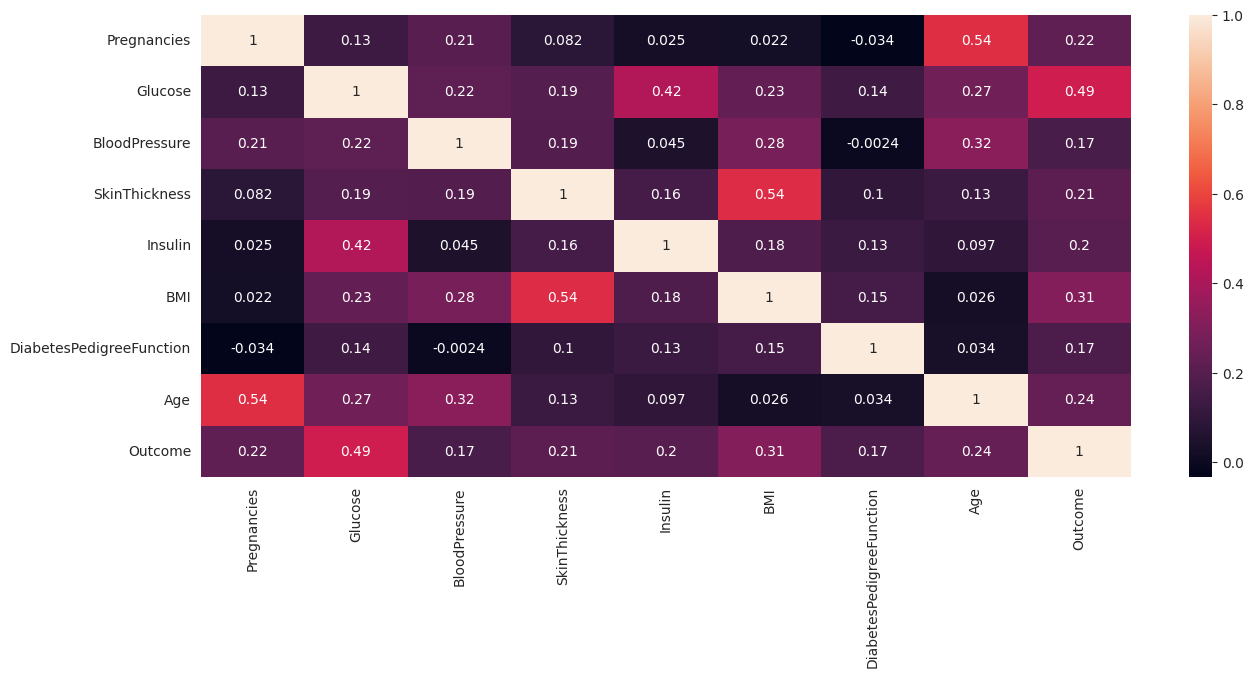

In [22]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(db.corr(),annot= True)
plt.show()

In [23]:
db['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [24]:
import plotly.express as px
import plotly.io as pio
ax= px.histogram(db,x= "Age", template= "plotly_dark",color= "Outcome",title='Age distribution')
ax.show()

In [25]:
ax= px.pie(db, names= "Outcome",template= "plotly_dark",title= "chances of Diabetes",hole= 0.5)
ax.show()

In [26]:
ax= px.scatter(db,x= "Glucose",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and glucose correlation")
ax.show()

In [27]:
ax= px.scatter(db,x= "BloodPressure",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and bloodpressure correlation")
ax.show()

In [28]:
dt= db.iloc[:,1:8]

In [29]:
ax = px.box(dt,template= "plotly_dark")
ax.show()

In [30]:
#importing essential libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [31]:
db.var()

,0
Pregnancies,11.354056
Glucose,926.489244
BloodPressure,146.328741
SkinThickness,77.285567
Insulin,7462.033002
BMI,47.268056
DiabetesPedigreeFunction,0.109779
Age,138.303046
Outcome,0.227483


In [32]:
db["Glucose"]= np.log(db.Glucose)
db["BloodPressure"]= np.log(db.BloodPressure)
db["Insulin"]= np.log(db.Insulin)
db["BMI"]= np.log(db.BMI)
db["SkinThickness"]= np.log(db.SkinThickness)
db["Age"]= np.log(db.Age)

In [33]:
db.var()

,0
Pregnancies,11.354056
Glucose,0.062353
BloodPressure,0.030536
SkinThickness,0.107463
Insulin,0.250383
BMI,0.044447
DiabetesPedigreeFunction,0.109779
Age,0.104137
Outcome,0.227483


In [34]:
#train test split
label= db["Outcome"]
train= db.drop("Outcome",axis= 1)

In [35]:
x_train,x_test,y_train,y_test= train_test_split(train,label,test_size= 0.3,random_state= 5)


In [36]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lrpred= lr.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,lrpred))

accuracy score:  0.7792207792207793


In [37]:
#classification report
cr= classification_report(y_test,lrpred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       160
           1       0.64      0.65      0.64        71

    accuracy                           0.78       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.78      0.78      0.78       231



In [38]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred= rf.predict(x_test)
accuracy_score(y_test,rfpred)

0.7792207792207793

In [39]:
#hyperparameter tuning
params={
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}


In [40]:
grid_search = GridSearchCV(estimator = rf, param_grid = params,cv = 3)

In [41]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200]})

In [42]:
grid_search.best_score_

np.float64(0.7783985102420857)

In [43]:
#classification report
cr= classification_report(y_test,rfpred)
print(cr)


              precision    recall  f1-score   support

           0       0.88      0.79      0.83       160
           1       0.61      0.76      0.68        71

    accuracy                           0.78       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.80      0.78      0.78       231



In [44]:
from pandas import DataFrame
model=[["RANDOMFOREST",accuracy_score(y_test,rfpred)],["LOGISTICREGRESSION",accuracy_score(y_test,lrpred)]]
dx= DataFrame(model,columns= ["model","score"])

In [45]:
ax= px.bar(dx,x= "model",y="score",template="plotly_dark",title= "scores",color= "model")
ax.show()